In [179]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [180]:
# Import the necessary libraries
import os
from PIL import Image
import numpy as np

images = []
labels = []

# assign directory
directory = '/content/sample_data/abnormal'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Open the image
        image = Image.open(f).convert('L')
        image = image.resize((200,200))

        # Convert the image to a NumPy array
        image_array = np.array(image)
        images.append(image_array)
        labels.append(0)

# assign directory
directory = '/content/sample_data/normal'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        # Open the image
        image = Image.open(f).convert('L')
        image = image.resize((200,200))
        # Convert the image to a NumPy array
        image_array = np.array(image)
        images.append(image_array)
        labels.append(1)

In [181]:
for i in range(len(images)):
    images[i] = images[i]/255

In [182]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)

In [183]:
images = np.array(images)
labels = np.array(labels)
x_train = np.array(x_train)
x_val = np.array(x_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

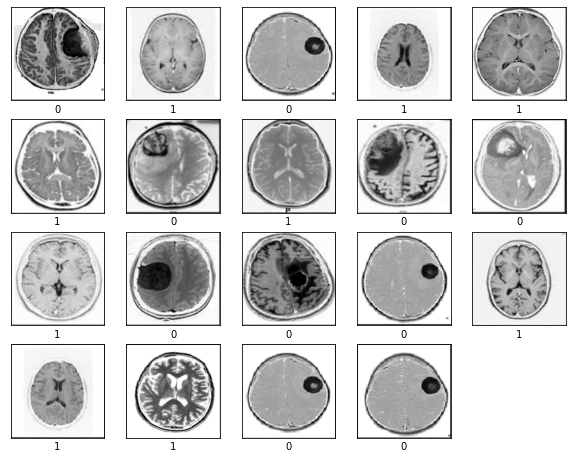

In [184]:
plt.figure(figsize=(10,10))
for i in range(19):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [185]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

model = Sequential([keras.layers.Flatten(input_shape = [200, 200]),
                    keras.layers.Dense(300, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(10, activation = "softmax" )])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 40000)             0         
                                                                 
 dense_40 (Dense)            (None, 300)               12000300  
                                                                 
 dense_41 (Dense)            (None, 100)               30100     
                                                                 
 dense_42 (Dense)            (None, 100)               10100     
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 dense_44 (Dense)            (None, 10)                1010      
                                                                 
Total params: 12,051,610
Trainable params: 12,051,610

In [186]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer = "sgd",
metrics = ["accuracy"])

In [187]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    validation_data = (x_val, y_val))

Epoch 1/10
1/1 [==============================] - 1s 673ms/step - loss: 2.3576 - accuracy: 0.2632 - val_loss: 1.9744 - val_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 116ms/step - loss: 2.0202 - accuracy: 0.4737 - val_loss: 1.5686 - val_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 108ms/step - loss: 1.5937 - accuracy: 0.6842 - val_loss: 1.1606 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 106ms/step - loss: 1.1984 - accuracy: 0.4737 - val_loss: 1.0084 - val_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 100ms/step - loss: 0.8797 - accuracy: 0.6316 - val_loss: 0.8254 - val_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 86ms/step - loss: 0.8275 - accuracy: 0.5263 - val_loss: 1.4601 - val_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 112ms/step - loss: 1.1042 - accuracy: 0.5263 - val_loss: 0.9131 - val_accuracy: 0.6000
Epoch 8/10
1/1 [=====

In [188]:
model.evaluate(images, labels)

1/1 [==============================] - 0s 51ms/step - loss: 1.0986 - accuracy: 0.5000


[1.0986336469650269, 0.5]